In [4]:
# FASHION MNIST
# I will do this by different methods one by one:
# 1) using tf.learn
# 2) using plain tensorflow
# 3) using CNN
# 4) keras

In [2]:
# Common imports
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import os

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import layers

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [20]:
print(tf.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [21]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets("/cxldata/datasets/project/fashion-mnist")

Extracting /cxldata/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz
Extracting /cxldata/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz
Extracting /cxldata/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz
Extracting /cxldata/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz


In [22]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [23]:
# Method 1: tf.learn

In [24]:
X_train = fashion_mnist.train.images
X_test = fashion_mnist.test.images
y_train = fashion_mnist.train.labels.astype("int")
y_test = fashion_mnist.test.labels.astype("int")

In [25]:
print("The shape of X_train is", X_train.shape)
print("The shape of X_test is", X_test.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)

The shape of X_train is (55000, 784)
The shape of X_test is (10000, 784)
The shape of y_train is (55000,)
The shape of y_test is (10000,)


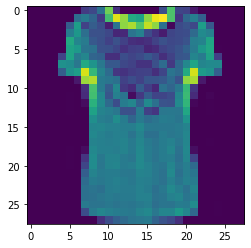

In [26]:
plt.imshow(X_train[1].reshape(28, -1))

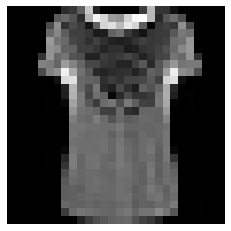

In [27]:
plot_image(X_train[1].reshape(28,-1))

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#train_images = train_images/255.0
#test_images = test_images/255.0

In [29]:
class_names[y_train[1]]

'T-shirt/top'

In [30]:
# there fore it is showing same result 

In [31]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[200, 200, 200], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=30000)

W0624 11:49:03.359251 140670801155904 estimator.py:453] Using temporary folder as model directory: /tmp/tmpso1r1ffw


SKCompat()

In [32]:
feature_cols

[_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)]

In [33]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

0.8918

In [34]:
# printing index of those images which are not prdicted correctly
a = y_test == y_pred['classes']
i = 0;
for j in a:
    if j == 0:
        print("Index of wrong prediction is",i)
        #print("Predicted:")
        #print(class_names(y_pred['classes'][i]))
        print("Predicted is " + class_names[y_pred['classes'][i]])
        #print("Actual:")
        #print(class_names(y_test[i]))
        print("Predicted is " + class_names[y_test[i]])
        print("-----")
        if i > 1000:
            break
    i += 1



Index of wrong prediction is 12
Predicted is Sandal
Predicted is Sneaker
-----
Index of wrong prediction is 17
Predicted is Pullover
Predicted is Coat
-----
Index of wrong prediction is 23
Predicted is Sandal
Predicted is Ankle boot
-----
Index of wrong prediction is 25
Predicted is Pullover
Predicted is Coat
-----
Index of wrong prediction is 40
Predicted is T-shirt/top
Predicted is Shirt
-----
Index of wrong prediction is 42
Predicted is Shirt
Predicted is Dress
-----
Index of wrong prediction is 43
Predicted is Ankle boot
Predicted is Sneaker
-----
Index of wrong prediction is 49
Predicted is Shirt
Predicted is Pullover
-----
Index of wrong prediction is 51
Predicted is Pullover
Predicted is Coat
-----
Index of wrong prediction is 57
Predicted is Shirt
Predicted is Coat
-----
Index of wrong prediction is 66
Predicted is Dress
Predicted is Pullover
-----
Index of wrong prediction is 67
Predicted is Coat
Predicted is Dress
-----
Index of wrong prediction is 68
Predicted is Sneaker
Pre

In [35]:
# lets check randomly any one of above result

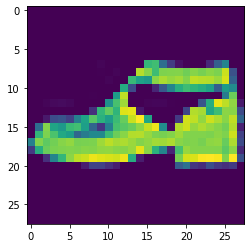

In [36]:
plt.imshow(X_test[23].reshape(28, -1))

In [39]:
class_names[y_test[23]]

'Ankle boot'

In [40]:
# This means it is predicted correctly
# So here completed our first method i.e. tf.learn with 89.18% accuracy

In [41]:
# Method 2: Plain tensorflow

In [42]:
len(X_train[0]) # lets check no. of features per image

784

In [43]:
import tensorflow as tf   # created hidden layers

n_inputs = 28*28  # MNIST
n_hidden1 = 150
n_hidden2 = 150
n_outputs = 10


In [44]:
# defining placeholders

In [45]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [46]:
# Let's define a function for creating the layers of out DNN

In [47]:
# Defining a neuron layer with its equation i.e. (z=x*w+b) along with its activation function and standard deviation)
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [48]:
# defining hidden layers and output layer with their inputs as previous layers for each succeding layer 
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [49]:
# We can use dense layer from tensorflow instead of creating our on neuron layer

In [50]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [51]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                          activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                          activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

W0624 11:55:24.118793 140670801155904 deprecation.py:323] From <ipython-input-51-56996712a747>:3: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0624 11:55:24.122505 140670801155904 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [52]:
# Afetr defining layers of neural network, we have to define loss function

In [53]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [54]:
# Defining gradient descent optimizer for better results

In [55]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [56]:
# Evaluation of model

In [57]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [58]:
# Initialize the variables and create a saver

In [59]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [60]:
# defining no. of epochs and batch size
n_epochs = 40  # experimented with different no. of epochs and here at this point maximum accuracy obtained on eval data
batch_size = 50

In [61]:
# Ttrain the model

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(fashion_mnist.train.num_examples // batch_size):
            X_batch, y_batch = fashion_mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: fashion_mnist.validation.images,
                                            y: fashion_mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "model_ckps/my_model_trial.ckpt")

0 Train accuracy: 0.72 Val accuracy: 0.8196
1 Train accuracy: 0.84 Val accuracy: 0.8348
2 Train accuracy: 0.9 Val accuracy: 0.8366
3 Train accuracy: 0.82 Val accuracy: 0.8522
4 Train accuracy: 0.8 Val accuracy: 0.852
5 Train accuracy: 0.9 Val accuracy: 0.8484
6 Train accuracy: 0.88 Val accuracy: 0.866
7 Train accuracy: 0.82 Val accuracy: 0.8664
8 Train accuracy: 0.82 Val accuracy: 0.866
9 Train accuracy: 0.92 Val accuracy: 0.8714
10 Train accuracy: 0.92 Val accuracy: 0.867
11 Train accuracy: 0.96 Val accuracy: 0.8738
12 Train accuracy: 0.86 Val accuracy: 0.8732
13 Train accuracy: 0.96 Val accuracy: 0.8758
14 Train accuracy: 0.88 Val accuracy: 0.8762
15 Train accuracy: 0.92 Val accuracy: 0.8754
16 Train accuracy: 0.92 Val accuracy: 0.881
17 Train accuracy: 0.96 Val accuracy: 0.877
18 Train accuracy: 0.96 Val accuracy: 0.8772
19 Train accuracy: 0.94 Val accuracy: 0.8828
20 Train accuracy: 0.96 Val accuracy: 0.882
21 Train accuracy: 0.92 Val accuracy: 0.8824
22 Train accuracy: 0.9 Val acc

In [62]:
# This second method of plain tensorflow is giving 89.20% accuracy , lets reuse this from where we stored this model

In [63]:
with tf.Session() as sess:
    saver.restore(sess, "model_ckps/my_model_trial.ckpt") # or better, use save_path
    X_new_scaled = fashion_mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred2 = np.argmax(Z, axis=1)

In [64]:
y_pred2

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0])

In [65]:
!ls -l model_ckps/

total 596
-rw-r--r-- 1 prachijindal0055855 prachijindal0055855     95 Jun 24 11:56 checkpoint
-rw-r--r-- 1 prachijindal0055855 prachijindal0055855 567640 Jun 24 11:56 my_model_trial.ckpt.data-00000-of-00001
-rw-r--r-- 1 prachijindal0055855 prachijindal0055855    304 Jun 24 11:56 my_model_trial.ckpt.index
-rw-r--r-- 1 prachijindal0055855 prachijindal0055855  30950 Jun 24 11:56 my_model_trial.ckpt.meta


In [66]:
print("Predicted classes:", y_pred2)
print("Actual classes:   ", fashion_mnist.test.labels[:20])

Predicted classes: [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
Actual classes:    [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [67]:
# Method 3: CNN

In [68]:
height = 28
width = 28
channels = 1
n_inputs = height * width

In [69]:
conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

In [70]:
n_fc1 = 64
n_outputs = 10

In [71]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X") # None, 784
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels]) # None, 28, 28, 1
    y = tf.placeholder(tf.int32, shape=[None], name="y") # [None]

In [72]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X") # None, 784
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels]) # None, 28, 28, 1
    y = tf.placeholder(tf.int32, shape=[None], name="y") # [None]

In [74]:
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")

W0624 11:59:56.238596 140670801155904 deprecation.py:323] From <ipython-input-74-6252cd028b8f>:3: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


In [75]:

# conv1 -> None, 28, 28, 32
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

In [76]:
# conv2 -> None, 14, 14, 64

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    # pool3 -> None, 7, 7, 64
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])
    #pool3_flat -> None, 64*7*7

In [77]:
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")


In [78]:

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

In [79]:
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

In [80]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [81]:

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [82]:
X_batch, y_batch = fashion_mnist.train.next_batch(batch_size)

In [83]:
X_reshaped = X_batch.reshape((-1, 28, 28))

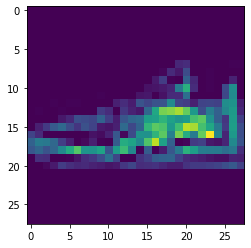

In [84]:
plt.imshow(X_reshaped[1])

In [85]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(fashion_mnist.train.num_examples // batch_size):
            X_batch, y_batch = fashion_mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: fashion_mnist.test.images, y: fashion_mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "model_ckps/my_mnist_model_cnn")

0 Train accuracy: 0.91 Test accuracy: 0.8712
1 Train accuracy: 0.91 Test accuracy: 0.8892
2 Train accuracy: 0.92 Test accuracy: 0.9009
3 Train accuracy: 0.95 Test accuracy: 0.9043
4 Train accuracy: 0.96 Test accuracy: 0.9073
5 Train accuracy: 0.96 Test accuracy: 0.9076
6 Train accuracy: 0.96 Test accuracy: 0.9058
7 Train accuracy: 0.98 Test accuracy: 0.9107
8 Train accuracy: 0.95 Test accuracy: 0.9096
9 Train accuracy: 0.98 Test accuracy: 0.9167


In [86]:
# In 10 iterations we are able to reach an accuracy more than 91% using CNN

In [3]:
# method 4: using keras 
# It is in different notebook in my github i.e. classification of fashion products using basic neural networks